# Lista 1 - Exercício 6

**Dada a equação não linear $f(x) = x\text{exp}(x)+x^2 = 0$, responda a seguir.**

**a. Escolha os extremos do intervalo em que existe uma raiz da função, e aplique o método da bisseção para encontrar uma raiz no intervalo escolhido. Use a tolerância de $\epsilon = 0.001$.**

Para utilizar o método da bisseção, precisamos encontrar extremos $a$ e $b$ tal que $f(a)f(b) < 0$, ou seja, $sign(f(a)) \neq sign(f(b))$. Podemos determinar tais valores através de tentativa é erro.

- Testando $x=0$, temos que $f(0)=0$, então zero não pode ser um extremo.
- Testando $x=-1$, temos que $f(-1)= 0.63 > 0$.
- Testando $x=-0.5$, temos que $f(-0.5) = -0.05 < 0$.

Portanto, tomamos os extremos $a=-1$ e $b=0.5$.

Para implementar o método da bisseção, começamos definindo a função e os valores de $a, b$ e $\epsilon$:

In [1]:
import numpy as np

eps = 0.001
a = -1
b = -0.5

def f(x):
    return x*np.exp(x)+x**2

print("Avaliando a e b:")
print(f"f(a) = f({a}) = {f(a):.3f}     |  sign(f(a)) = {np.sign(f(a))}")
print(f"f(b) = f({b}) = {f(b):.3f}  |  sign(f(b)) = {np.sign(f(b))}")


Avaliando a e b:
f(a) = f(-1) = 0.632     |  sign(f(a)) = 1.0
f(b) = f(-0.5) = -0.053  |  sign(f(b)) = -1.0


Agora definimos e executamos o método da bisseção:

In [2]:
def metodo_bissecao(f, a, b, eps, verbose=True):
    k = 0
    a_k = a
    b_k = b

    while b_k-a_k > eps:
        x_k = (a_k+b_k)/2

        if verbose:
            print(f"Iteração {k}:")
            print(f"   a_{k} = {a_k}")
            print(f"   b_{k} = {b_k}")
            print(f"   x_{k} = {x_k}")

        if np.sign(f(a_k))==np.sign(f(x_k)):
            a_k = x_k
        else:
            b_k = x_k

        k = k+1

    if verbose:
        print(30*"-")
        print(f"Precisou de {k} iterações.")
        print(f"Por fim, tivemos a_k={a_k}, b_k={b_k} e b_k-a_k={b_k-a_k}")

    return k, a_k, b_k, x_k

k_bissecao, a_k, b_k, x_k_bissecao = metodo_bissecao(f, a, b, eps)


Iteração 0:
   a_0 = -1
   b_0 = -0.5
   x_0 = -0.75
Iteração 1:
   a_1 = -0.75
   b_1 = -0.5
   x_1 = -0.625
Iteração 2:
   a_2 = -0.625
   b_2 = -0.5
   x_2 = -0.5625
Iteração 3:
   a_3 = -0.625
   b_3 = -0.5625
   x_3 = -0.59375
Iteração 4:
   a_4 = -0.59375
   b_4 = -0.5625
   x_4 = -0.578125
Iteração 5:
   a_5 = -0.578125
   b_5 = -0.5625
   x_5 = -0.5703125
Iteração 6:
   a_6 = -0.5703125
   b_6 = -0.5625
   x_6 = -0.56640625
Iteração 7:
   a_7 = -0.5703125
   b_7 = -0.56640625
   x_7 = -0.568359375
Iteração 8:
   a_8 = -0.568359375
   b_8 = -0.56640625
   x_8 = -0.5673828125
------------------------------
Precisou de 9 iterações.
Por fim, tivemos a_k=-0.5673828125, b_k=-0.56640625 e b_k-a_k=0.0009765625


**b. Resolva o problema de encontrar a raiz da função através da aplicação do método de Newton e do método da secante, partindo de $x^0 = -2$, e $x^0=-2$ e $x^1=2$, respectivamente. Para ambos os algoritmos use $\epsilon = 0.001$.**

Para o método de Newton, precisamos da derivada de $f(x)$, que é $f'(x) = 2x+\text{exp}(x)(x+1)$. Definimos a derivada:

In [3]:
def f_linha(x):
    return 2*x + np.exp(x)*(x+1)

Assim, podemos definir e executar o algoritmo de Newton, tomando $x_0 = -2$:

In [4]:
def algoritmo_newton(f, f_linha, x_0, eps, verbose=True):
    k = 0
    x_k = x_0

    while abs(f(x_k)) > eps:
        if verbose:
            print(f"Iteração {k}")
            print(f"   x_{k} = {x_k}")
            print(f"   |f(x_{k})| = {abs(f(x_k))}")

        if f_linha(x_k) != 0:
            x_k = x_k - f(x_k)/f_linha(x_k)
            k += 1

        else:
            if verbose:
                print(f"   f'(x_{k}) = 0.")
                print(f"   Tente novamente com outro x_0.")

    if verbose:
        print(30*"-")
        print(f"Precisou de {k} iterações.")
        print(f"Por fim, tivemos x_{k}={x_k} e |f(x_{k})|={abs(f(x_k))}.")

    return k, x_k

x_0 = -2
k_newton, x_k_newton = algoritmo_newton(f, f_linha, x_0, eps)

Iteração 0
   x_0 = -2
   |f(x_0)| = 3.7293294335267744
Iteração 1
   x_1 = -1.098179669096158
   |f(x_1)| = 0.8397802969838689
Iteração 2
   x_2 = -0.7214445401322083
   |f(x_2)| = 0.1698243724016592
Iteração 3
   x_3 = -0.5915594748640884
   |f(x_3)| = 0.02253603549514771
------------------------------
Precisou de 4 iterações.
Por fim, tivemos x_4=-0.5680123746281043 e |f(x_4)|=0.0007734995870781192.


Por fim, definimos e executamos o algoritmo da secante, usando $x_0 = -2$ e $x_1 = 2$:

In [5]:
def algoritmo_secante(f, x_0, x_1, eps, verbose=True):
    k = 1
    x_k = x_1
    x_k1 = x_0

    while abs(f(x_k)) > eps:
        if verbose:
            print(f"Iteração {k}:")
            print(f"   x_{k} = {x_k}")
            print(f"   x_{k-1} = {x_k1}")
            print(f"   |f(x_{k})| = {abs(f(x_k))}")

        x_novo = x_k - f(x_k)*(x_k-x_k1)/(f(x_k)-f(x_k1))
        x_k1 = x_k
        x_k = x_novo

        k += 1

    if verbose:
        print(30*"-")
        print(f"Precisou de {k} iterações.")
        print(f"Por fim, tivemos x_{k}={x_k} e |f(x_{k})|={abs(f(x_k))}.")

    return k, x_k
        
x_0 = -2
x_1 = 2
k_secante, x_k_secante = algoritmo_secante(f, x_0, x_1, eps)

Iteração 1:
   x_1 = 2
   x_0 = -2
   |f(x_1)| = 18.7781121978613
Iteração 2:
   x_2 = -2.991264075487953
   x_1 = 2
   |f(x_2)| = 8.797427792287113
Iteração 3:
   x_3 = -7.3907905520308015
   x_2 = -2.991264075487953
   |f(x_3)| = 54.61922554570603
Iteração 4:
   x_4 = -2.1465893050670743
   x_3 = -7.3907905520308015
   |f(x_4)| = 4.356947718727471
Iteração 5:
   x_5 = -1.6919996675229876
   x_4 = -2.1465893050670743
   |f(x_5)| = 2.5512795880046166
Iteração 6:
   x_6 = -1.0496971073507846
   x_5 = -1.6919996675229876
   |f(x_6)| = 0.7344240961881779
Iteração 7:
   x_7 = -0.7900603451764805
   x_6 = -1.0496971073507846
   |f(x_7)| = 0.2656522104048658
Iteração 8:
   x_8 = -0.6429246447094759
   x_7 = -0.7900603451764805
   |f(x_8)| = 0.07533283767472232
Iteração 9:
   x_9 = -0.5846849096765436
   x_8 = -0.6429246447094759
   |f(x_9)| = 0.01602240212903744
Iteração 10:
   x_10 = -0.5689517516580451
   x_9 = -0.5846849096765436
   |f(x_10)| = 0.0016119490048962515
----------------------

In [6]:
print("Resultados obtidos com cada método:\n")
print(f"Método da Bisseção: {k_bissecao} iterações, x_{k_bissecao} = {x_k_bissecao}")
print(f"Algoritmo de Newton: {k_newton} iterações, x_{k_newton} = {x_k_newton}")
print(f"Algoritmo de Newton: {k_secante} iterações, x_{k_secante} = {x_k_secante}")

Resultados obtidos com cada método:

Método da Bisseção: 9 iterações, x_9 = -0.5673828125
Algoritmo de Newton: 4 iterações, x_4 = -0.5680123746281043
Algoritmo de Newton: 11 iterações, x_11 = -0.5671918452766623


**c. Verifique o erro relativo das três estimativas para a raiz.**

O erro relativo é definido como $\frac{|\hat{x}-x|}{x}$, sendo $\hat{x}$ a estimativa da solução e $x$ a solução verdadeira. Definimos a função para calcular o erro relativo.

In [7]:
def erro_relativo(x_estimado, x_real):
    return abs(x_estimado - x_real)/x_real

Plotando a função entre $-1$ e $1$ juntamente com o eixo $x$, percebemos que $f(x)$ possui duas raízes, sendo uma igual a $0$ (verificamos antes que $f(0)=0$) e a outra sendo próxima de $-0.56$:

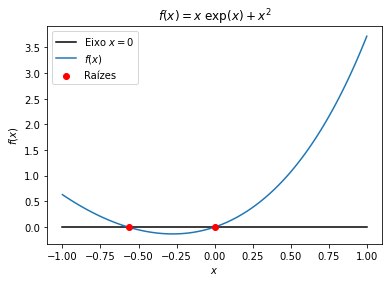

In [8]:
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)
y = f(x)

plt.plot(x, np.zeros(100), color='black', label='Eixo $x = 0$')
plt.plot(x, y, label='$f(x)$')
plt.scatter([0, -0.56], [f(0), f(-0.56)], zorder=3, color='red', label='Raízes')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('$f(x) = x$ exp$(x)+x^2$')
plt.show()

Dadas as soluções encontradas pelos métodos avaliados, parece que a solução real que estão aproximando é a solução que está próxima de $-0.56$. Entretanto, temos que $-0.56$ não é a raiz, pois:

In [9]:
print(f"f({-0.56}) = {f(-0.56)} != 0")

f(-0.56) = -0.006277075755336314 != 0


Portanto, precisamos determinar qual a solução real para poder calcular o erro de aproximação dos métodos.

Para isso, vou executar o algoritmo de Newton com um $\epsilon$ bem pequeno ($\epsilon = \text{exp}(-100)$), de forma a encontrar a solução (se tiver sorte), ou então uma melhor aproximação dela.

In [10]:
_, x_real = algoritmo_newton(f, f_linha, x_0, 1e-100, verbose=False)
print(f"Solução encontrada: {x_real}")
print(f"f({x_real}) = {f(x_real)}")

Solução encontrada: -0.5671432904097838
f(-0.5671432904097838) = 0.0


Boa! Agora podemos encontrar o erro relativo de cada método:

In [11]:
print("Erro relativo de cada método:\n")

print(f'Método da Bisseção:')
print(f'   Solução: {x_k_bissecao}')
print(f'   Erro relativo: {erro_relativo(x_k_bissecao, x_real)}\n')

print(f'Algoritmo de Newton:')
print(f'   Solução: {x_k_newton}')
print(f'   Erro relativo: {erro_relativo(x_k_newton, x_real)}\n')

print(f'Algoritmo da Secante:')
print(f'   Solução: {x_k_secante}')
print(f'   Erro relativo: {erro_relativo(x_k_secante, x_real)}\n')

Erro relativo de cada método:

Método da Bisseção:
   Solução: -0.5673828125
   Erro relativo: -0.0004223308188008282

Algoritmo de Newton:
   Solução: -0.5680123746281043
   Erro relativo: -0.001532389138717464

Algoritmo da Secante:
   Solução: -0.5671918452766623
   Erro relativo: -8.561304999907347e-05

